In [1]:
total_seconds = 5142.8571

hours = int(total_seconds / 3600)
minutes = int((total_seconds % 3600)/60)
seconds = (total_seconds % 3600) % 60

print("Hours:", hours)
print("Minutes:", minutes)
print("Seconds:", seconds)

Hours: 1
Minutes: 25
Seconds: 42.85710000000017


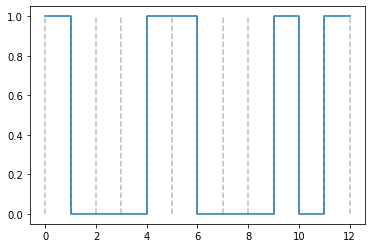

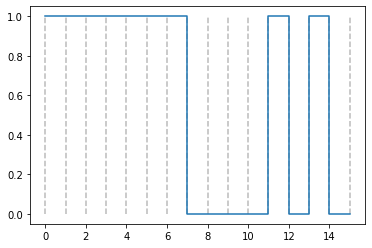

In [2]:
import matplotlib.pyplot as plt

a = "100011000101"
b = "111111100001010"


for q in [a,b]:
    
    X = list()
    Y = list()
    time = 0
    
    last_bit = int(q[0])
    X.append(time)
    Y.append(last_bit)
    
    for bit in q[1:]:
        
        time += 1
        bit = int(bit)
        
        if bit != last_bit:
            X.extend([time, time])
            Y.extend([last_bit, bit])
            
        last_bit = bit
    
    X.append(time + 1)
    Y.append(last_bit)
    
    plt.figure()
    
    for x in range(X[-1] + 1):
        plt.plot([x, x], [0, 1], "--", color="#bbb")
    
    plt.plot(X, Y)
    

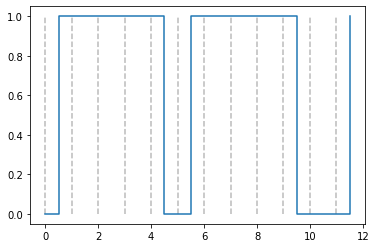

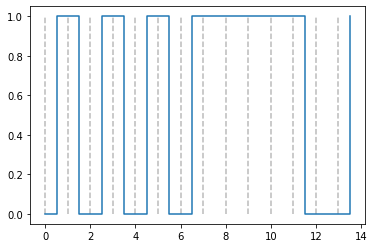

In [3]:
import matplotlib.pyplot as plt

a = "100011000101"
b = "111111100001010"


for q in [a,b]:
    
    X = list()
    Y = list()
    time = 0
    signal = 0
    
    X.append(time)
    Y.append(signal)
    
    time += 0.5
    
    for bit in q:
        
        bit = int(bit)
        
        if bit == 1:
            X.extend([time, time])
            Y.extend([signal, not signal])
            signal = not signal
            
        last_bit = bit
        
        time += 1
    
    plt.figure()
    
    for x in range(int(X[-1]) + 1):
        plt.plot([x, x], [0, 1], "--", color="#bbb")
    
    plt.plot(X, Y)
    

Hex:  A 9 D F F
Raw:  1010 1001 1101 1111 1111
Encoded:  10110 10011 11011 11101 11101
Signal: 1011010011110111110111101
Hex:  F 2 5 7 0
Raw:  1111 0010 0101 0111 0000
Encoded:  11101 10100 01011 01111 11110
Signal: 1110110100010110111111110


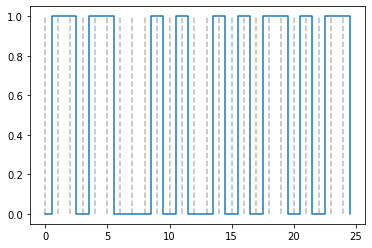

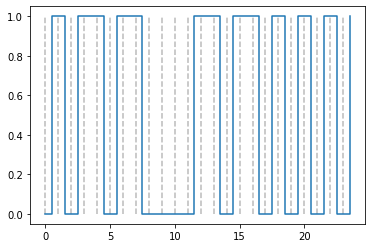

In [4]:


import matplotlib.pyplot as plt

a = "A9DFF"
b = "F2570"

encoding =  {
    
    "0000" : "11110",
    "0001" : "01001",
    "0010" : "10100",
    "0011" : "10101",
    
    "0100" : "01010",
    "0101" : "01011",
    "0110" : "01110",
    "0111" : "01111",
    
    "1000" : "10010",
    "1001" : "10011",
    "1010" : "10110",
    "1011" : "10111",
    
    "1100" : "11010",
    "1101" : "11011",
    "1110" : "11100",
    "1111" : "11101"
}
        
    

        
for q in [a,b]:
    
    hex_raw_str = ""
    binary_raw_str = ""
    binary_encoded_str = ""
    
    binary_signal = ""
    
    for hex_digit in q:
        
        hex_raw_str += " " + hex_digit
        
        binary = bin(int(hex_digit, 16))[2:].rjust(4, "0")
        encoded = encoding[binary]
        
        binary_raw_str += " " + binary
        binary_encoded_str += " " + encoded
        
        binary_signal += encoded
    
    print("Hex:", hex_raw_str)
    print("Raw:", binary_raw_str)
    print("Encoded:", binary_encoded_str)
    print("Signal:", binary_signal)
    
    X = list()
    Y = list()
    time = 0
    signal = 0
    
    X.append(time)
    Y.append(signal)
    
    time += 0.5
    
    for bit in binary_signal:
        
        bit = int(bit)
        
        if bit == 1:
            X.extend([time, time])
            Y.extend([signal, not signal])
            signal = not signal
            
        last_bit = bit
        
        time += 1
    
    plt.figure()
    
    for x in range(int(X[-1]) + 1):
        plt.plot([x, x], [0, 1], "--", color="#bbb")
    
    plt.plot(X, Y)
    

(Version for Moodle)

In [23]:
encoding =  {
    
    "0000" : "11110",
    "0001" : "01001",
    "0010" : "10100",
    "0011" : "10101",
    
    "0100" : "01010",
    "0101" : "01011",
    "0110" : "01110",
    "0111" : "01111",
    
    "1000" : "10010",
    "1001" : "10011",
    "1010" : "10110",
    "1011" : "10111",
    
    "1100" : "11010",
    "1101" : "11011",
    "1110" : "11100",
    "1111" : "11101"
}
        
    
def modulateInputs(text):
    
    text = str(text)
    binary = set(text) == set("01")
    four_bit = len(text) % 4 == 0
    
    if not (binary and four_bit):
        print("Error: Input must be in 4 bit binary")
        return

    result = ""
    for i in range(0, len(text), 4):
        nibble = text[i:i+4]
        result += encoding[nibble]
    
    return result

In [126]:
def hammingEncode(text):
    
    text = str(text)
    binary = set(text) <= set("01")
    
    if not binary:
        print("Error: Input must be in binary")
        return
    
    # This is wonderfully inefficient and messy, but I don't know
    # how else to approach this.
    
    # The idea is to build the bit string incrementally, and every
    # time we hit a parity bit, compute the bit by looping through
    # the rest of the source string. 
    
    # First, figure out where the parity bits are.
    
    parity_positions = set()
    
    power = 0
    while (2**power - 1) < len(text) + len(parity_positions):
        parity_positions.add(2**power - 1)
        power += 1
    
    # Create a padded version of the source string, for
    # the sake of calculating parity bits.
    
    padded_text = ""
    i = 0
    j = 0
    while i < len(text):
        if j in parity_positions:
            padded_text += "0"
        else:
            padded_text += text[i]
            i += 1
        j += 1
        
    # Build the result. This is a nested loop - one for
    # each digit in the result, and then inner loops for
    # computing the value of a given parity bit
        
    result = ""
        
    i = 0
    while i < len(padded_text):
        
        # If we're not at a parity bit, just
        # add the data bit and continue
        
        if not i in parity_positions:
            result += padded_text[i]
            i += 1
            continue
            
        # Collect the relevant segments of data
        # to the current parity bit
            
        segments = ""
        seg_length = i + 1
        seg_starts = range(i, len(padded_text), seg_length*2)
        
        for j in seg_starts:
            segments += padded_text[j:j+seg_length]
        
        # Finally, find the sum modulo 2 of all the relevant data
        # digits.
        
        parity_value = 0
        for digit in segments:
            parity_value += int(digit)
        parity_value = parity_value % 2
        
        result += str(parity_value)
        i += 1
        
    return result